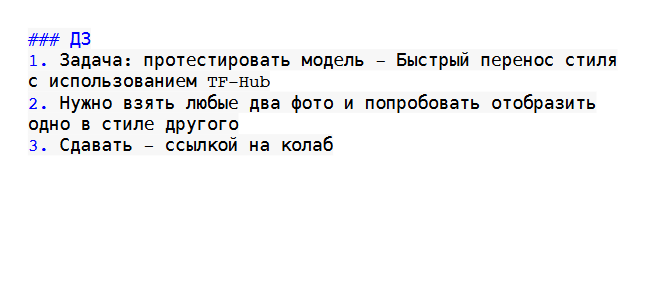

# ДЗ

Задача: протестировать модель - Быстрый перенос стиля с использованием TF-Hub
Нужно взять любые два фото и попробовать отобразить одно в стиле другого
Сдавать - ссылкой на колаб

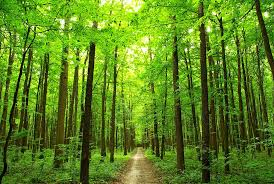

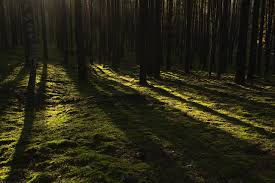

Импортируем бибилотеки:

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Функция для загрузки изображений:

In [ ]:
def load_image(image_path, target_size=(256, 256)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img = np.array(img) / 255.0
    img = img.astype(np.float32)
    img = np.expand_dims(img, axis=0)
    return img

Загрузим изображения:

In [ ]:
content_image = load_image("forest1.jpg")
style_image = load_image("forest_2.jpg")

Загрузим модель TF-Hub для переноса стиля:

In [ ]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Выполним перенос стиля:

In [ ]:
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

Выведем результат:

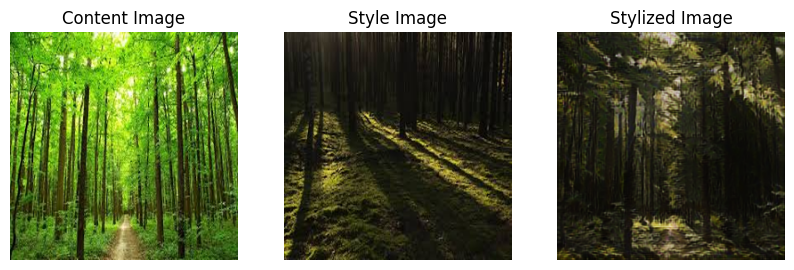

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.title("Content Image")
plt.imshow(np.squeeze(content_image))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Style Image")
plt.imshow(np.squeeze(style_image))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Stylized Image")
plt.imshow(tensor_to_image(stylized_image))
plt.axis('off')

plt.show()

Сохраним результат:

In [ ]:
tensor_to_image(stylized_image).save("stylized_result.jpg")